In [1]:
import datajoint as dj
from microns_phase3 import nda, utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Connecting microns@db.datajoint.com:3306


Could not create the ~log table
Could not access table `microns_phase3_nda`.`~log`
Could not create the ~log table
Could not access table `microns_phase3_nda`.`~log`


In [18]:
scan_key = {'session': 4, 'scan_idx': 7} 
frame_times = (nda.ScanTimes & scan_key).fetch1('frame_times')
nda.Field & scan_key

session Session ID,scan_idx Scan ID,field Field Number,px_width field pixels per line,px_height lines per field,um_width field width (microns),um_height field height (microns),field_x field x motor coordinates (microns),field_y field y motor coordinates (microns),field_z field z motor coordinates (microns)
4,7,1,248,440,620.0,1100.0,-485.0,-235.0,80.0
4,7,2,248,440,620.0,1100.0,95.0,-235.0,80.0
4,7,3,248,440,620.0,1100.0,-485.0,-235.0,220.0
4,7,4,248,440,620.0,1100.0,95.0,-235.0,220.0
4,7,5,248,440,620.0,1100.0,-485.0,-235.0,360.0
4,7,6,248,440,620.0,1100.0,95.0,-235.0,360.0
4,7,7,248,440,620.0,1100.0,-485.0,-235.0,500.0
4,7,8,248,440,620.0,1100.0,95.0,-235.0,500.0


In [3]:
nda.Trial & scan_key & "type='stimulus.Clip'"

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,type type of stimulus trial,start_idx index of field 1 scan frame at start of trial,end_idx index of field 1 scan frame at end of trial,start_frame_time start time of stimulus frame relative to scan start (seconds),end_frame_time end time of stimulus frame relative to scan start (seconds),stim_times full vector of stimulus frame times relative to scan start (seconds),condition_hash 120-bit hash (The first 20 chars of MD5 in base64)
4,7,0,stimulus.Clip,55,117,8.7030508518219,18.66956400871277,=BLOB=,JEL5/i5FccX4ykUOKaDW
4,7,1,stimulus.Clip,118,181,18.76955008506775,28.736061811447144,=BLOB=,AAQ1HNKGrg1cIXlMw7nz
4,7,2,stimulus.Clip,182,244,28.83605670928955,38.80255699157715,=BLOB=,ksTS42zV+O0YJqa0+s4Y
4,7,3,stimulus.Clip,245,308,38.90255165100098,48.869056224823,=BLOB=,m5JLObtSRnbRKw1ukcSE
4,7,4,stimulus.Clip,309,371,48.9690465927124,58.93554878234863,=BLOB=,L8Z/mji+v1WipuJe4GaL
4,7,5,stimulus.Clip,372,434,59.0355486869812,69.00203704833984,=BLOB=,3+VHi96yg36hu1kI8ZBn
4,7,10,stimulus.Clip,815,878,129.38436770439148,139.35087418556213,=BLOB=,JOYs8Wny1GJlw6AxCVo5
4,7,11,stimulus.Clip,879,941,139.4508776664734,149.41737604141235,=BLOB=,mG4xsIyTTnaRWKW82yeD
4,7,12,stimulus.Clip,942,1004,149.5173785686493,159.48388195037842,=BLOB=,hnYVTt6SOC5gw43jdDOb
4,7,13,stimulus.Clip,1005,1068,159.58387088775635,169.5503752231598,=BLOB=,HvUTYlGssHeK5Ub4iNLY


In [4]:
trial_key = {'session': 4, 'scan_idx': 7, 'trial_idx': 14}
trial_info = nda.Trial & trial_key
trial_info

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,type type of stimulus trial,start_idx index of field 1 scan frame at start of trial,end_idx index of field 1 scan frame at end of trial,start_frame_time start time of stimulus frame relative to scan start (seconds),end_frame_time end time of stimulus frame relative to scan start (seconds),stim_times full vector of stimulus frame times relative to scan start (seconds),condition_hash 120-bit hash (The first 20 chars of MD5 in base64)
4,7,14,stimulus.Clip,1069,1131,169.63370418548584,179.60021686553955,=BLOB=,pBsrFShgY2qLi+7xYSGi


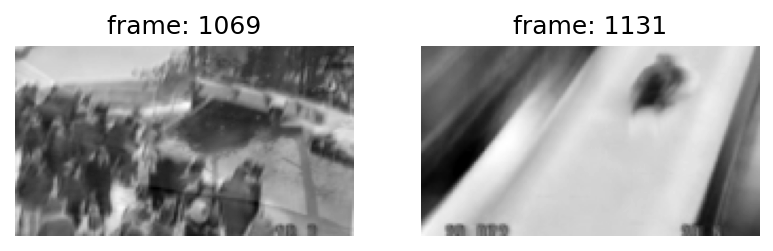

In [10]:
movie = (nda.Stimulus & scan_key).fetch1('movie') # stimulus images synchronized with nda.ScanTimes
start, end = (trial_info * nda.Clip).fetch1('start_idx', 'end_idx') # Fetch indices of trial
# print(f'Trial starts at index: {start} and ends at index {end}')
stimulus_trial_slice = movie[:,:,slice(start, end)] # slice movie according to indices of trial
# stimulus_trial_slice.shape
fig, axs = plt.subplots(1, 2, dpi=150) # view first and last frame of movie slice
axs[0].imshow(stimulus_trial_slice[:,:,0], cmap='gray')
axs[0].set_title(f'frame: {start}')
axs[1].imshow(stimulus_trial_slice[:,:,-1], cmap='gray')
axs[1].set_title(f'frame: {end}')
[ax.axis('off') for ax in axs];


In [6]:
nda.ManualPupil & scan_key

session Session ID,scan_idx Scan ID,pupil_min_r vector of pupil minor radii synchronized with field 1 frame times (pixels),pupil_maj_r vector of pupil major radii synchronized with field 1 frame times (pixels),pupil_x vector of pupil x positions synchronized with field 1 frame times (pixels),pupil_y vector of pupil y positions synchronized with field 1 frame times (pixels)
4,7,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [7]:
nda.ManualPupil & scan_key

session Session ID,scan_idx Scan ID,pupil_min_r vector of pupil minor radii synchronized with field 1 frame times (pixels),pupil_maj_r vector of pupil major radii synchronized with field 1 frame times (pixels),pupil_x vector of pupil x positions synchronized with field 1 frame times (pixels),pupil_y vector of pupil y positions synchronized with field 1 frame times (pixels)
4,7,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [3]:
treadmill_v = (nda.Treadmill & scan_key).fetch1('treadmill_velocity')

In [4]:
len(treadmill_v)

40000

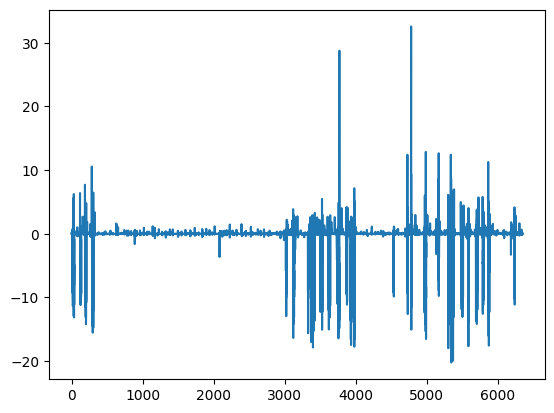

In [5]:
plt.plot(frame_times, treadmill_v)

In [4]:
pupil_data = (nda.ManualPupil & scan_key).fetch1()

In [5]:
non_nan_indices = np.where(~np.isnan(pupil_data['pupil_maj_r']))[0]
non_nan_indices

array([    8,     9,    10, ..., 33894, 33895, 33896])

In [14]:
len(non_nan_indices)

27871

In [15]:
non_nan_indices = np.where(~np.isnan(pupil_data['pupil_min_r']))[0]
len(non_nan_indices)

27871

In [ ]:
non_nan_indices 

array([    8,     9,    10, ..., 33894, 33895, 33896])

In [10]:
pupil_data['pupil_min_r'][10]

73.68145158100415

In [11]:
pupil_data['pupil_maj_r'][10]

86.6987404781289

In [6]:
pupil_sz = []
for i in non_nan_indices:
    pupil_sz.append(np.pi * pupil_data['pupil_maj_r'][i] * pupil_data['pupil_min_r'][i])

In [7]:
pupil_times = frame_times[~np.isnan(pupil_data['pupil_min_r'])]

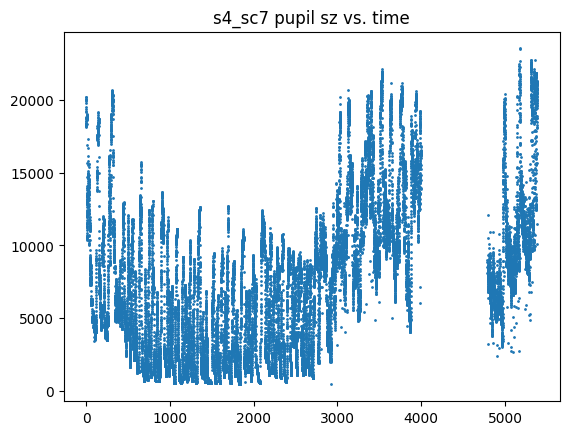

In [8]:
plt.scatter(pupil_times, pupil_sz, s=1)
plt.title("s4_sc7 pupil sz vs. time")
plt.show()

In [18]:
frame_times[-1]

6350.637286623

In [12]:
trials_data = (nda.Trial & scan_key).fetch()
stim_type = trials_data["type"]
start_idx = trials_data["start_idx"]
end_idx = trials_data["end_idx"]

In [15]:
frame_stim_type = ['none'] * len(frame_times)

# Iterate through each trial in the data
for t in trials_data:
    stim_type = t["type"]
    start_idx = t["start_idx"]
    end_idx = t["end_idx"]

    # Update frame_stim_type for frames within the trial
    for i in range(start_idx, end_idx):
        # Make sure the index i is within the bounds of frame_stim_type
        if i < len(frame_stim_type):
            frame_stim_type[i] = stim_type


In [9]:
len(frame_stim_type)

40000

In [8]:
len(frame_times)

40000

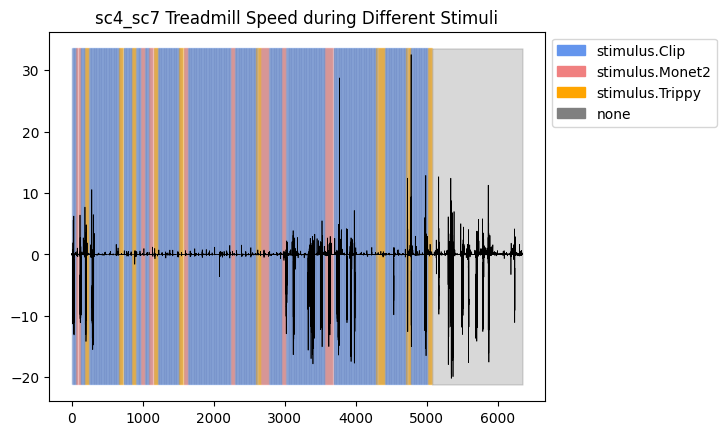

In [17]:
colors = {'stimulus.Clip': 'cornflowerblue', 'stimulus.Monet2': 'lightcoral', 'stimulus.Trippy': 'orange', 'none': 'grey'}
plt.plot(frame_times, treadmill_v, label="Treadmill Velocity", color="black", lw=0.5)
prev_type = frame_stim_type[0]
start_idx = 0

y_min = min(treadmill_v) - 1  # Adding a buffer to min and max values for aesthetics
y_max = max(treadmill_v) + 1

for i in range(1, len(frame_times)):
    if frame_stim_type[i] != prev_type or i == len(frame_times) - 1:
        plt.fill_between(frame_times[start_idx:i+1], y_min, y_max, color=colors[prev_type], alpha=0.3)
        start_idx = i
        prev_type = frame_stim_type[i]

legend_handles = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.title("sc4_sc7 Treadmill Speed during Different Stimuli")

plt.show()

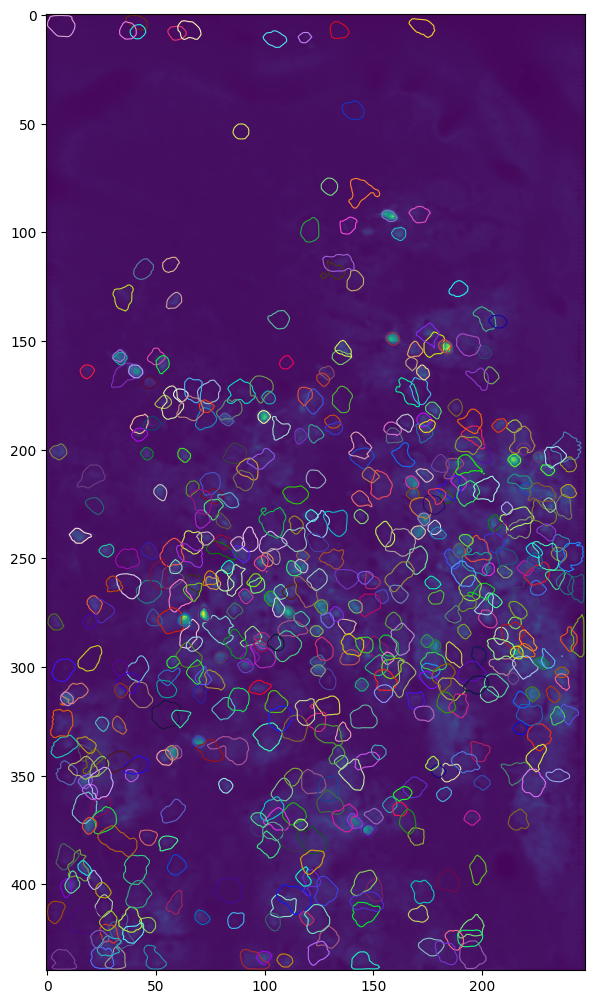

In [2]:
field_key = {'session': 4, 'scan_idx': 7, 'field': 1}
masks = utils.get_all_masks(field_key, mask_type='soma', plot=True) # function that will retrieve masks in convenient format and optionally plot

In [5]:
nda.Segmentation * nda.MaskClassification & field_key & "mask_type='soma'"

session Session ID,scan_idx Scan ID,field Field Number,"mask_id mask ID, unique per field",pixels indices into the image in column major (Fortran) order,weights weights of the mask at the indices above,mask_type classification of mask as soma or artifact
4,7,1,1,=BLOB=,=BLOB=,soma
4,7,1,3,=BLOB=,=BLOB=,soma
4,7,1,4,=BLOB=,=BLOB=,soma
4,7,1,5,=BLOB=,=BLOB=,soma
4,7,1,6,=BLOB=,=BLOB=,soma
4,7,1,8,=BLOB=,=BLOB=,soma
4,7,1,9,=BLOB=,=BLOB=,soma
4,7,1,10,=BLOB=,=BLOB=,soma
4,7,1,11,=BLOB=,=BLOB=,soma
4,7,1,12,=BLOB=,=BLOB=,soma


In [6]:
masks = (nda.Segmentation * nda.MaskClassification & field_key & "mask_type='soma'").fetch()
mask_id = masks[0]['mask_id']
mask_id

1

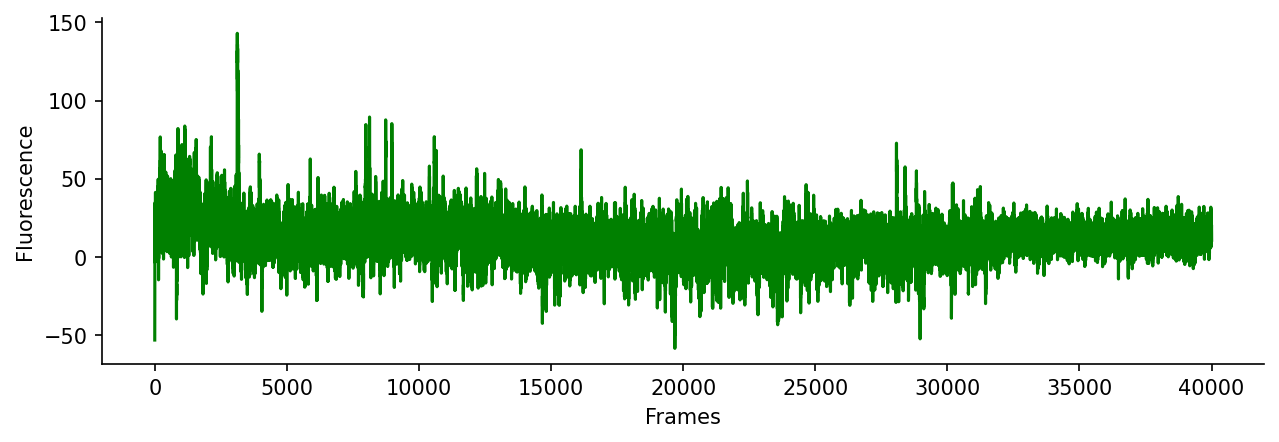

In [7]:
calcium_trace = (nda.Fluorescence() & field_key & {'mask_id': 1}).fetch1('trace')
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
ax.plot(calcium_trace, c='g')
ax.set_xlabel('Frames')
ax.set_ylabel('Fluorescence')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [9]:
nda.ScanUnit() &  field_key & {'mask_id': 1}

session Session ID,scan_idx Scan ID,unit_id unique per scan,field Field Number,"mask_id mask ID, unique per field",um_x centroid x motor coordinates (microns),um_y centroid y motor coordinates (microns),um_z centroid z motor coordinates (microns),px_x centroid x pixel coordinate in field (pixels,px_y centroid y pixel coordinate in field (pixels,ms_delay delay from start of frame (field 1 pixel 1) to recording of this unit (milliseconds)
4,7,1,1,1,-778,-771,80,7,5,0


In [ ]:
unit_oracle = (nda.Oracle & field_key &  {'unit_id': 1}).fetch('pearson')
unit_oracle

In [16]:
oracles = (nda.Oracle & field_key ).fetch('pearson')
high_oracle_percentile = np.percentile(oracles, 99)

In [19]:
high_oracle_table = nda.Oracle & scan_key & f'pearson>{high_oracle_percentile}'
high_oracle_table

session Session ID,scan_idx Scan ID,unit_id unique per scan,trials number of trials used,pearson per unit oracle pearson correlation over all movies
4,7,130,60,0.623745
4,7,327,60,0.61131
4,7,493,60,0.54457
4,7,688,60,0.561252
4,7,756,60,0.617953
4,7,775,60,0.638734
4,7,795,60,0.613519
4,7,907,60,0.574646
4,7,1070,60,0.553697
4,7,1177,60,0.57389


In [20]:
nda.ScanUnit() &  field_key & {'unit_id': 130}

session Session ID,scan_idx Scan ID,unit_id unique per scan,field Field Number,"mask_id mask ID, unique per field",um_x centroid x motor coordinates (microns),um_y centroid y motor coordinates (microns),um_z centroid z motor coordinates (microns),px_x centroid x pixel coordinate in field (pixels,px_y centroid y pixel coordinate in field (pixels,ms_delay delay from start of frame (field 1 pixel 1) to recording of this unit (milliseconds)
4,7,130,1,130,-701,-130,80,37,262,11


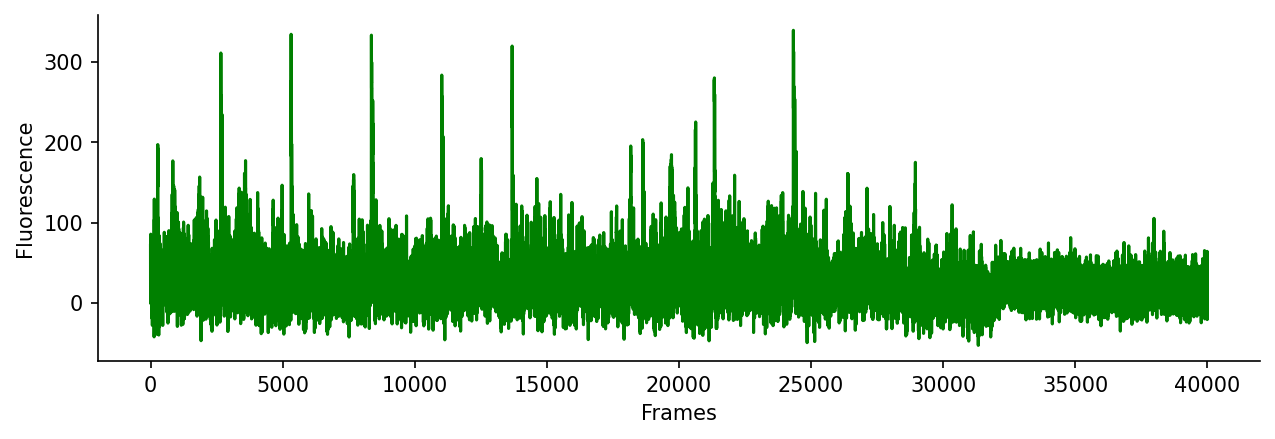

In [21]:
calcium_trace = (nda.Fluorescence() & field_key & {'mask_id': 130}).fetch1('trace')
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)
ax.plot(calcium_trace, c='g')
ax.set_xlabel('Frames')
ax.set_ylabel('Fluorescence')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)